In [4]:
from pytrends.request import TrendReq
# Login to Google. Only need to run this once
pytrend = TrendReq()
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
# keyword = 'cryptocurrency', cathegory = 16 (news), timeframe- limit range to 8 months to get daily data
pytrend.build_payload(kw_list=['bitcoin'], cat=16, timeframe='2017-11-15 2018-03-21')  

story_ggtrends_btc = pytrend.interest_over_time()
# Upsampling daily data to hourly data
story_ggtrends_btc = story_ggtrends_btc.resample('1d').pad().drop(['isPartial'], axis='columns')
story_ggtrends_btc.columns = ['SearchFrequency']

In [5]:
story_ggtrends_btc.to_csv('googletrends_bitcoin.csv')

In [7]:
len(story_ggtrends_btc)

127

In [10]:
#OK I need to slice the data frame and then plot it. this is in blue
#I need to the plot the search frequency, this is in orange

In [49]:
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime
from pytrends.request import TrendReq
%matplotlib inline

##### following API worked
pip install cryptocmd required

In [12]:
from cryptocmd import CmcScraper

# initialise scraper
scraper = CmcScraper('ETH', '15-11-2017', '21-3-2018')

# get data as list of list
headers, data = scraper.get_data()

# export the data to csv
scraper.export_csv()

# get dataframe for the data
df = scraper.get_dataframe()

In [53]:
#print(df[0:15]) debugging

In [14]:
df = df.sort_values('Date')

In [15]:
## df.iloc[-5:,:]

In [16]:
df = df.set_index("Date")


In [45]:
#df.Close.loc['2017-11-15':'2018-03-21'] for debugging

In [18]:
df_eth_price = df.Close.loc['2017-11-15':'2018-03-21']

In [46]:
#df_eth_price for debugging

In [20]:
type(df_eth_price) #not dataframe!!!!

pandas.core.series.Series

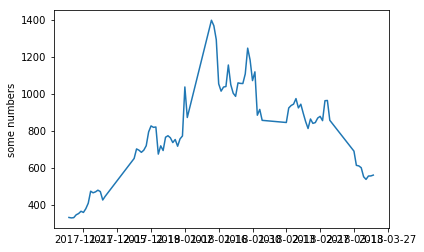

In [52]:
import matplotlib.pyplot as plt
#plt.plot(stuff)
plt.plot(df_eth_price)
plt.ylabel('some numbers')
plt.show()

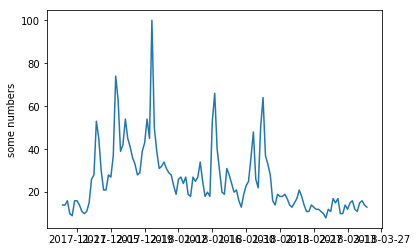

In [48]:
#plt.plot(df_eth_price)
plt.plot(story_ggtrends_btc)
plt.ylabel('some numbers')
plt.show()

In [23]:
##Normalize the axes!

In [24]:
print(story_ggtrends_btc.max())
df_gg_norm = story_ggtrends_btc/(story_ggtrends_btc.max())

SearchFrequency    100
dtype: int64


In [25]:
print(df_eth_price.max())
df_eth_norm = df_eth_price/(df_eth_price.max())

1396.42


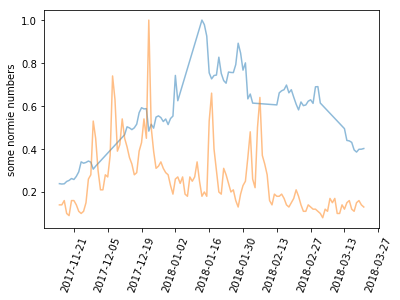

In [26]:
plt.plot(df_eth_norm, alpha = 0.5)
plt.plot(df_gg_norm, alpha = 0.5)
plt.ylabel('some normie numbers')
plt.xticks(rotation=70)
plt.show()

### Now TEXT BLOB

In [27]:
 df2 = pd.read_csv('LatestReddit/THIS/DONE/ETH/df_mega_eth.csv')

In [28]:
import datetime
import time

In [29]:
int_time = [int(item) for item in df2['timestamp']]

In [30]:
df2['timestamp'] = [datetime.datetime.fromtimestamp(item) for item in int_time]

In [31]:
from textblob import TextBlob

In [32]:
df2 = df2[df2.text.str.contains("[deleted]") == False]

In [33]:
df2['text'] = [str(item) for item in df2['text']]

In [34]:
textblob_objects = [TextBlob(item) for item in df2['text']]

In [35]:
sent_polarity = [item.sentiment.polarity for item in textblob_objects]

In [36]:
sent_subjectivity = [item.sentiment.polarity for item in textblob_objects]

In [37]:
df2['sent polarity'] = sent_polarity
df2['sent subjectivity'] = sent_subjectivity

In [38]:
df2['sent polarity'] =  df2['sent polarity'] +0.9765625
df2['sent subjectivity']= df2['sent subjectivity']+0.9765625

In [39]:
df2 = df2.set_index(df2['timestamp'])

In [40]:
df_mean = df2.groupby(df2['timestamp'].dt.normalize()).mean() #.dt.normalize()) hmmmm

In [41]:
df_mean['sent polarity'].min()

0.86117788461538458

In [42]:
list1 = df_mean['sent polarity'].loc['2017-11-15':'2018-03-21']
df_mean['sent polarity'].max()
mean_list_norm = list1/(df_mean['sent polarity'].max())


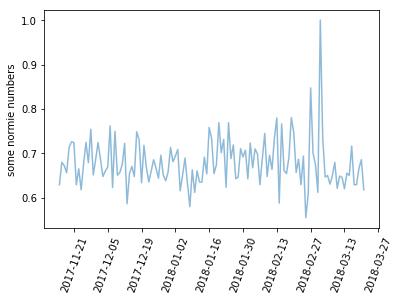

In [43]:
import matplotlib.pyplot as plt
plt.plot(mean_list_norm, alpha = 0.5)
#plt.plot(df_gg_norm, alpha = 0.5)
plt.ylabel('some normie numbers')
plt.xticks(rotation=70)
plt.show()

#### following plot is plotting all 3 along a normalized axis

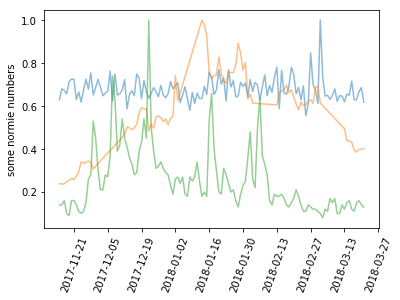

In [44]:
import matplotlib.pyplot as plt
plt.plot(mean_list_norm, alpha = 0.5)
plt.plot(df_eth_norm, alpha = 0.5)
plt.plot(df_gg_norm, alpha = 0.5)
#plt.plot(df_gg_norm, alpha = 0.5)
plt.ylabel('some normie numbers')
plt.xticks(rotation=70)
plt.show()

### Extra stuff from debugging

In [96]:
df_eth_price.head(1)

Date
2017-01-12    466.54
Name: Close, dtype: float64

In [97]:
df_eth_price.tail(1)

Date
2018-12-03    699.83
Name: Close, dtype: float64

In [98]:
print(story_ggtrends_btc.head(1),story_ggtrends_btc.tail(1))

            SearchFrequency
date                       
2017-11-15               14             SearchFrequency
date                       
2018-03-21               13
